### Question 2: Correlation Analysis and setup (6 points)

In [45]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_squared_log_error, median_absolute_error, explained_variance_score
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.linear_model import Lasso

In [2]:
from sklearn.datasets import fetch_openml
housing = fetch_openml(name="house_prices", as_frame=True)

In [3]:
type(housing)

sklearn.utils._bunch.Bunch

In [4]:
# Convert to DataFrame
df = pd.DataFrame(housing.data)

# Optional: Include the target variable in the DataFrame
df['target'] = housing.target
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,target
0,1.0,60.0,RL,65.0,8450.0,Pave,None,Reg,Lvl,AllPub,...,0.0,None,None,None,0.0,2.0,2008.0,WD,Normal,208500.0
1,2.0,20.0,RL,80.0,9600.0,Pave,None,Reg,Lvl,AllPub,...,0.0,None,None,None,0.0,5.0,2007.0,WD,Normal,181500.0
2,3.0,60.0,RL,68.0,11250.0,Pave,None,IR1,Lvl,AllPub,...,0.0,None,None,None,0.0,9.0,2008.0,WD,Normal,223500.0
3,4.0,70.0,RL,60.0,9550.0,Pave,None,IR1,Lvl,AllPub,...,0.0,None,None,None,0.0,2.0,2006.0,WD,Abnorml,140000.0
4,5.0,60.0,RL,84.0,14260.0,Pave,None,IR1,Lvl,AllPub,...,0.0,None,None,None,0.0,12.0,2008.0,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456.0,60.0,RL,62.0,7917.0,Pave,None,Reg,Lvl,AllPub,...,0.0,None,None,None,0.0,8.0,2007.0,WD,Normal,175000.0
1456,1457.0,20.0,RL,85.0,13175.0,Pave,None,Reg,Lvl,AllPub,...,0.0,None,MnPrv,None,0.0,2.0,2010.0,WD,Normal,210000.0
1457,1458.0,70.0,RL,66.0,9042.0,Pave,None,Reg,Lvl,AllPub,...,0.0,None,GdPrv,Shed,2500.0,5.0,2010.0,WD,Normal,266500.0
1458,1459.0,20.0,RL,68.0,9717.0,Pave,None,Reg,Lvl,AllPub,...,0.0,None,None,None,0.0,4.0,2010.0,WD,Normal,142125.0


### 1. Provide the number of rows and columns. Does the dataset have any missing values? (1point).

In [5]:
df.shape

(1460, 81)

Number of Rows - 1460
Number of Columns - 81

In [6]:
# Check if any missing values exist in the DataFrame
any_missing_values = df.isna().any().any()

any_missing_values

True

Missing values exsist, not asked to remove null values, therefore not removing!!

In [7]:
# Get all column names
column_names = df.columns.tolist()

# Print the column names
print(column_names)

['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC'

### 2. Print out the correlation matrix of the features. How many features are highly correlated witheach other? Are there any features correlated with the target variable ( let’s define highlycorrelated as >0.8?) (2 points)

##### A) To check how many features are highly correlated to each other, we have to drop the target column from the dataframe. Also we can drop the column Id, since it serves no purpose to our analysis.

In [8]:
df_clean = df.drop('Id', axis=1)

In [9]:
df = df_clean

Creating a new dataframe for part 2.

In [10]:
df1 = df.drop('target',axis=1)

Now, we can find all the features that are highly correlated to each other. As mentioned in the question, highly correlated features are those which have correlation value above 0.8 in the correlation matrix.

In [11]:
df1.corr()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
MSSubClass,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,...,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407
LotFrontage,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,...,0.344997,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450
LotArea,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,...,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261
OverallQual,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,...,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347
OverallCond,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,...,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950
YearBuilt,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,...,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618
YearRemodAdd,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,...,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743
MasVnrArea,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,...,0.373066,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201
BsmtFinSF1,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,...,0.296970,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359
BsmtFinSF2,-0.065649,0.049900,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.072319,-0.050117,1.000000,...,-0.018227,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706


The corr() function in pandas calculates the correlation between numeric columns by default. It does not provide correlation values for non-numeric features because correlation is a statistical measure specifically designed for numeric data.

If you have non-numeric features in your DataFrame and want to examine the relationship between them, you can explore other methods suitable for analyzing categorical or textual data, such as chi-squared test, contingency table analysis, or information theory-based metrics like mutual information.

In [12]:

# Assuming you already have a DataFrame named 'df1'
# Filter out non-numeric columns
numeric_columns = df1.select_dtypes(include=np.number).columns

# Calculate the correlation matrix for numeric columns
correlation_matrix = df1[numeric_columns].corr()

# Find feature pairs with correlation greater than 0.8
correlation_pairs = correlation_matrix.stack() > 0.8
feature_pairs = correlation_pairs[correlation_pairs].index.tolist()

# Print the feature pairs
print(feature_pairs)

[('MSSubClass', 'MSSubClass'), ('LotFrontage', 'LotFrontage'), ('LotArea', 'LotArea'), ('OverallQual', 'OverallQual'), ('OverallCond', 'OverallCond'), ('YearBuilt', 'YearBuilt'), ('YearBuilt', 'GarageYrBlt'), ('YearRemodAdd', 'YearRemodAdd'), ('MasVnrArea', 'MasVnrArea'), ('BsmtFinSF1', 'BsmtFinSF1'), ('BsmtFinSF2', 'BsmtFinSF2'), ('BsmtUnfSF', 'BsmtUnfSF'), ('TotalBsmtSF', 'TotalBsmtSF'), ('TotalBsmtSF', '1stFlrSF'), ('1stFlrSF', 'TotalBsmtSF'), ('1stFlrSF', '1stFlrSF'), ('2ndFlrSF', '2ndFlrSF'), ('LowQualFinSF', 'LowQualFinSF'), ('GrLivArea', 'GrLivArea'), ('GrLivArea', 'TotRmsAbvGrd'), ('BsmtFullBath', 'BsmtFullBath'), ('BsmtHalfBath', 'BsmtHalfBath'), ('FullBath', 'FullBath'), ('HalfBath', 'HalfBath'), ('BedroomAbvGr', 'BedroomAbvGr'), ('KitchenAbvGr', 'KitchenAbvGr'), ('TotRmsAbvGrd', 'GrLivArea'), ('TotRmsAbvGrd', 'TotRmsAbvGrd'), ('Fireplaces', 'Fireplaces'), ('GarageYrBlt', 'YearBuilt'), ('GarageYrBlt', 'GarageYrBlt'), ('GarageCars', 'GarageCars'), ('GarageCars', 'GarageArea'),

1. ('YearBuilt', 'GarageYrBlt')
2. ('TotalBsmtSF', '1stFlrSF')
3. ('GrLivArea', 'TotRmsAbvGrd')
5. ('GarageCars', 'GarageArea')

From the above result, these 4 pairs have correlation value > 0.8. Let's see if we can find them with code.

Also, it is highly possible that the correlation value is negative, and whether or not to consider features with negative correlation depends on the specific context and goals of our analysis. Negative correlation can provide valuable insights and may be just as meaningful as positive correlation.

Therefore for now, we will take all those feature pairs whose absolute value in correlation matrix is greater than 0.8

In [13]:
# Assuming you already have a DataFrame named 'df1'
# Filter out non-numeric columns
numeric_columns = df1.select_dtypes(include='number').columns

# Calculate the correlation matrix for numeric columns
correlation_matrix = df1[numeric_columns].corr()

# Find feature pairs with absolute value of correlation greater than 0.8
correlation_pairs = correlation_matrix.stack()
feature_pairs = correlation_pairs[abs(correlation_pairs) > 0.8].reset_index()
feature_pairs = feature_pairs[feature_pairs['level_0'] != feature_pairs['level_1']]

# Print the feature pairs
for _, row in feature_pairs.iterrows():
    print(row['level_0'], "-", row['level_1'], ":", row[0])

YearBuilt - GarageYrBlt : 0.8256674841743408
TotalBsmtSF - 1stFlrSF : 0.8195299750050339
1stFlrSF - TotalBsmtSF : 0.8195299750050339
GrLivArea - TotRmsAbvGrd : 0.8254893743088425
TotRmsAbvGrd - GrLivArea : 0.8254893743088425
GarageYrBlt - YearBuilt : 0.8256674841743408
GarageCars - GarageArea : 0.882475414281462
GarageArea - GarageCars : 0.882475414281462


GarageArea - GarageCars : 0.882475414281462

GarageYrBlt - YearBuilt : 0.8256674841743408

TotRmsAbvGrd - GrLivArea : 0.8254893743088425

1stFlrSF - TotalBsmtSF : 0.8195299750050339

These are the 4 pairs whose correlation value is greater than 0.8.

##### B) Are there any features correlated with the target variable ? (considering threshold value of 0.5)


In [14]:
# Assuming you already have a DataFrame named 'df1'
# Filter out non-numeric columns
numeric_columns = df.select_dtypes(include='number').columns

# Calculate the correlation matrix for numeric columns
correlation_matrix = df[numeric_columns].corr()

# Find feature pairs with correlation greater than 0.5
correlation_pairs = correlation_matrix.stack()
feature_pairs = correlation_pairs[abs(correlation_pairs) > 0.5].reset_index()
feature_pairs = feature_pairs[feature_pairs['level_0'] == "target"]

# Print the feature pairs
for _, row in feature_pairs.iterrows():
    print(row['level_0'], "-", row['level_1'], ":", row[0])

target - OverallQual : 0.7909816005838053
target - YearBuilt : 0.5228973328794967
target - YearRemodAdd : 0.5071009671113866
target - TotalBsmtSF : 0.6135805515591943
target - 1stFlrSF : 0.6058521846919153
target - GrLivArea : 0.7086244776126515
target - FullBath : 0.5606637627484453
target - TotRmsAbvGrd : 0.5337231555820284
target - GarageCars : 0.6404091972583519
target - GarageArea : 0.6234314389183622
target - target : 1.0


The features mentioned below are correlated with target variable:
1. OverallQual
2. YearBuilt
3. YearRemodAdd
4. TotalBsmtSF
5. 1stFlrSF
6. GrLivArea
7. FullBath
8. TotRmsAbvGrd
9. GarageCars
10. GarageArea

### 3. Prevent collinearity by removing linearly dependent variables. (3 points) For example, if 2 variables A and B have a correlation coefficient larger than 0.8, eliminate one to avoid redundancy.

From Question 2, part A), we know that there are 4 pairs for which correlation coefficient is greater than 0.8. Let's remove the feature which has lower correlation coefficient witht the target variable. 

1. GarageArea - GarageCars --> Here GarageArea has lower correlation coefficient with target variable, therefore we can remove GarageArea.

2. GarageYrBlt - YearBuilt --> Here GarageYrBlt has lower correlation coefficient with target variable, therefore we can remove GarageYrBlt.

3. TotRmsAbvGrd - GrLivArea --> Here TotRmsAbvGrd has lower correlation coefficient with target variable, therefore we can remove TotRmsAbvGrd.

4. 1stFlrSF - TotalBsmtSF --> Here 1stFlrSF has lower correlation coefficient with target variable, therefore we can remove 1stFlrSF.

In [15]:
# preventing collinearity by removing linearly dependent variables
column_names_toDrop = ['GarageArea','GarageYrBlt','TotRmsAbvGrd','1stFlrSF']

# Considering only important columns whose correlation coefficient values are greater than 0.5
df2 = df.drop(columns=column_names_toDrop)

In [16]:
df2

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,target
0,60.0,RL,65.0,8450.0,Pave,None,Reg,Lvl,AllPub,Inside,...,0.0,None,None,None,0.0,2.0,2008.0,WD,Normal,208500.0
1,20.0,RL,80.0,9600.0,Pave,None,Reg,Lvl,AllPub,FR2,...,0.0,None,None,None,0.0,5.0,2007.0,WD,Normal,181500.0
2,60.0,RL,68.0,11250.0,Pave,None,IR1,Lvl,AllPub,Inside,...,0.0,None,None,None,0.0,9.0,2008.0,WD,Normal,223500.0
3,70.0,RL,60.0,9550.0,Pave,None,IR1,Lvl,AllPub,Corner,...,0.0,None,None,None,0.0,2.0,2006.0,WD,Abnorml,140000.0
4,60.0,RL,84.0,14260.0,Pave,None,IR1,Lvl,AllPub,FR2,...,0.0,None,None,None,0.0,12.0,2008.0,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60.0,RL,62.0,7917.0,Pave,None,Reg,Lvl,AllPub,Inside,...,0.0,None,None,None,0.0,8.0,2007.0,WD,Normal,175000.0
1456,20.0,RL,85.0,13175.0,Pave,None,Reg,Lvl,AllPub,Inside,...,0.0,None,MnPrv,None,0.0,2.0,2010.0,WD,Normal,210000.0
1457,70.0,RL,66.0,9042.0,Pave,None,Reg,Lvl,AllPub,Inside,...,0.0,None,GdPrv,Shed,2500.0,5.0,2010.0,WD,Normal,266500.0
1458,20.0,RL,68.0,9717.0,Pave,None,Reg,Lvl,AllPub,Inside,...,0.0,None,None,None,0.0,4.0,2010.0,WD,Normal,142125.0


Now that we are cleaning data, we should also handle the missing values and encode the categorical values.

For numerical missing values, we are using mean of the column to fill the missing values and we are using mode for missing categorical values. 

In [18]:
# Get all the categorical column names 
categorical_columns = df.select_dtypes(include='object').columns.tolist()
numerical_columns = df.select_dtypes(include='number').columns.tolist()

In [19]:
df_filled = df.copy()  # Create a copy of the original DataFrame
df_filled[numerical_columns] = df_filled[numerical_columns].fillna(df_filled[numerical_columns].mean().iloc[0])
df_filled[categorical_columns] = df_filled[categorical_columns].fillna(df_filled[categorical_columns].mode().iloc[0])

In [20]:
df_filled.isna().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
target           0
Length: 80, dtype: int64

No more missing values.

To use categorical variables, we have to encode them. There are various encoding techniques, so for this case we are using one hot encoding on categorical variables.

In [21]:
encoded_df = pd.get_dummies(df_filled)

### 4. Divide the dataset into train, validate and test (60% train, 20% validate, 20% test). Print the size of each of these datasets

In [22]:
# Assuming you already have a DataFrame named 'df' containing your dataset
# Split the dataset into train and test (60% train, 40% test)
train_df, test_df = train_test_split(encoded_df, test_size=0.4, random_state=42)

# Split the test dataset into validation and test (50% each)
validate_df, test_df = train_test_split(test_df, test_size=0.5, random_state=42)

# Print the sizes of the resulting datasets
print("Train dataset size:", len(train_df))
print("Validation dataset size:", len(validate_df))
print("Test dataset size:", len(test_df))

Train dataset size: 876
Validation dataset size: 292
Test dataset size: 292


## Question 3: (14 points) Let's look at "GrLivArea" feature, which stands for "Above grade (ground) living area square feet". This variable measures the total area of livable (habitable) space above ground. It makes intuitive sense that this would be a good predictor of the price of a house, as larger houses generally tend to be more expensive.

### a) Create a scatter plot of SalePrice vsGrLivArea

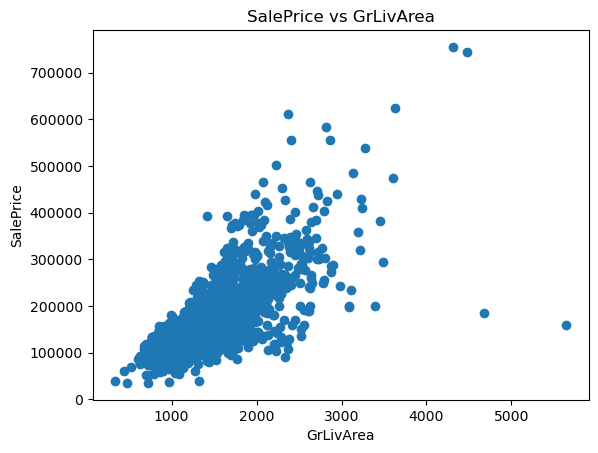

In [23]:
# Assuming you already have a DataFrame named 'df' with columns 'SalePrice' and 'GrLivArea'
# Scatter plot of SalePrice vs GrLivArea
plt.scatter(encoded_df['GrLivArea'], encoded_df['target'])

# Set the axis labels and title
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.title('SalePrice vs GrLivArea')

# Display the plot
plt.show()

### b) Fit a simple linear regression model on this variable.

In [41]:
# Create the feature matrix X and target variable y
X1 = train_df[['GrLivArea']]  # Features
y1 = train_df['target']    # Target variable

# Create an instance of the LinearRegression model
model1 = LinearRegression()

# Fit the model to the data
model1.fit(X1, y1)

# Print the coefficients and intercept
print("Coefficient:", model1.coef_[0])
print("Intercept:", model1.intercept_)

Coefficient: 95.14328806908998
Intercept: 35085.78904624944


### c) Print out the model summary

In [43]:
# summary of the model
print('Model intercept :', model1.intercept_)
print('Model coefficients : ', model1.coef_)
print('Model R-squared score : ', model1.score(X1, y1))

Model intercept : 35085.78904624944
Model coefficients :  [95.14328807]
Model R-squared score :  0.4434638290226084


### d) Create a new scatter plot with the regression line that you just modeled.

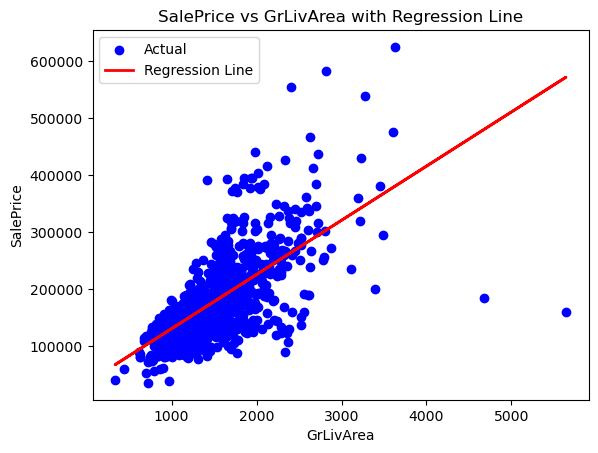

In [26]:
# Make predictions using the fitted model
y_pred = model1.predict(X)

# Create a scatter plot of GrLivArea vs SalePrice
plt.scatter(X, y, color='blue', label='Actual')
plt.plot(X, y_pred, color='red', linewidth=2, label='Regression Line')

# Set the axis labels and title
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.title('SalePrice vs GrLivArea with Regression Line')

# Add a legend
plt.legend()

# Display the plot
plt.show()

### e) Evaluate the prediction performance of the model on the validation set with RMSE and MAE as performance metrics.

In [27]:
# Load the validation set (assuming you already have a DataFrame named 'validate_df')
X_val = validate_df[['GrLivArea']]  # Features
y_val = validate_df['target']    # Target variable

# Make predictions on the validation set
y_pred = model1.predict(X_val)

# Calculate RMSE and MAE
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
mae = mean_absolute_error(y_val, y_pred)

# Print the performance metrics
print("RMSE:", rmse)
print("MAE:", mae)

RMSE: 65946.76454242594
MAE: 42537.82271585775


### f) Evaluate the prediction performance of the model on the test set with RMSE and MAE asperformance metrics. Choose a random data point from the test set and perform a prediction using the model.

In [28]:
X_test = test_df[['GrLivArea']]  # Features
y_test = test_df['target']    # Target variable

# Make predictions on the test set
y_pred = model1.predict(X_test)

# Calculate RMSE and MAE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

# Print the performance metrics
print("RMSE on test set:", rmse)
print("MAE on test set:", mae)

# Select a random data point from the test set
random_index = np.random.randint(0, len(X_test))
random_data_point = X_test.iloc[random_index]

# Perform prediction on the random data point
random_prediction = model1.predict([random_data_point])[0]

print("\nRandom Data Point:")
print("GrLivArea:", random_data_point.values[0])
print("Actual SalePrice:", y_test.iloc[random_index])
print("Predicted SalePrice:", random_prediction)

RMSE on test set: 45646.46969933778
MAE on test set: 33210.76450949269

Random Data Point:
GrLivArea: 816.0
Actual SalePrice: 118500.0
Predicted SalePrice: 112722.71211062686


/Users/pratikhotchandani/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### g) Summarize your findings in your own words on this simple linear regression model.

This is a very basic linear regression model since it contains only one predictor feature. To test the performance of this univariate linear regression model, we obtained the RMSE and MAE scores on test set. The RMSE and MAE values are pretty high! Also the R-squared (Represents the proportion of variability of the data explained by the model, Range: {0-1}) value, which is 0.44 is very less. The higher R-squared value we have, the better the model is fitted. 

The target - SalePrice depends on a lot of features, and building a linear regression model to predict the price based only on a single feature will for sure give poor results. 

Thus we can say that the single variable linear regression model has a poor performance on predicting the house sale prices.

## Question 4: (9 points) Now consider all the features (after removing linearly dependent variables in question 1).

### a. Fit a linear regression model on the training set with a package of your choice. Present the model summary.

In [29]:
# Create the feature matrix X and target variable y
X = train_df.drop('target',axis=1)  # Considering all the features available
y = train_df['target']    # Target variable

# Create an instance of the LinearRegression model
model2 = LinearRegression()

# Fit the model to the data
model2.fit(X, y)

LinearRegression()

In [30]:
print('Model intercept :', model2.intercept_)
print('Model coefficients : ', model2.coef_)
print('Model R-squared score : ', model2.score(X, y))

Model intercept : -775944.1305737748
Model coefficients :  [ 1.80464234e+02  2.93724086e+01  7.48684547e-01  7.27906855e+03
  4.56287031e+03  2.32361952e+02  1.08504292e+02  2.46220992e+01
  1.03274492e+01  7.34926739e+00 -1.77919338e+00  1.58976301e+01
  1.07223867e+01  2.39698841e+01 -8.64329877e+00  2.60490675e+01
  3.45268739e+03  8.20608870e+02  5.19932087e+03  2.94925954e+03
 -4.15077278e+03 -1.47392231e+04  2.15060225e+03  2.53867109e+03
 -6.08616641e+00  1.48021914e+03  3.60531507e+01  1.64865754e+01
 -3.90312049e+00  2.26399838e+01  5.03795564e+01  5.41265475e+01
  1.00779435e+02  1.96373995e+00 -3.22895643e+02 -8.19925771e+01
 -1.97637087e+04  1.04884644e+04 -2.15969814e+03  3.27494638e+03
  8.15999612e+03 -3.18392554e+04  3.18392554e+04 -5.48288976e+03
  5.48288976e+03 -4.79605470e+03  1.43204058e+02  5.91614805e+03
 -1.26329741e+03 -7.77216274e+03  1.17027623e+04 -6.78073837e+03
  2.85013877e+03  1.76495165e+04 -1.76495165e+04  5.85137684e+03
  1.42526895e+04 -1.00196886e+0

### b. Evaluate the model on the test set. Print out the coefficient of determination (R**2) and MSE.

In [31]:
# Load the test set (assuming you already have a DataFrame named 'test_df')
X_test = test_df.drop('target',axis=1)  # Features
y_test = test_df['target']    # Target variable

# Make predictions on the test set
y_pred = model2.predict(X_test)

# Calculate RMSE and MAE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r_squared = model2.score(X, y)
mse = mean_squared_error(y_test, y_pred)

# Print the MSE
print("Mean Squared Error:", mse)
# Print the performance metrics
print("RMSE on test set:", rmse)
print("R-Squared on test set:", r_squared)

Mean Squared Error: 506515178.59158325
RMSE on test set: 22505.89208610899
R-Squared on test set: 0.9365976948593676


### c. What are the most important features? Check this againnn!!!!

In [32]:
# Get the coefficients of the features
coefficients = pd.Series(model2.coef_, index=X.columns)

# Sort the coefficients in descending order
sorted_coefficients = coefficients.abs().sort_values(ascending=False)

# Get the top k features
k = 5  # Specify the number of top features you want to retrieve
top_features = sorted_coefficients.head(k)

# Print the top features
print(top_features)

RoofMatl_ClyTile    537980.305157
Condition2_PosN     176859.839616
RoofMatl_Metal      126852.913354
GarageQual_Ex       119639.483781
GarageCond_Ex       114619.177422
dtype: float64


## Question 5: (6 points)

### a. Compare the test set performance of Model 1 and Model 2.

In [34]:
X_test1 = test_df[['GrLivArea']]  # Features
y_test1 = test_df['target']    # Target variable

# Make predictions on the test set
y_pred1 = model1.predict(X_test1)

# Calculate RMSE and MAE
rmse1 = np.sqrt(mean_squared_error(y_test1, y_pred1))
mae1 = mean_absolute_error(y_test1, y_pred1)

# Print the performance metrics
print("RMSE on test set:", rmse1)
print("MAE on test set:", mae1)

RMSE on test set: 45646.46969933778
MAE on test set: 33210.76450949269


In [35]:
# Load the test set (assuming you already have a DataFrame named 'test_df')
X_test2 = test_df.drop('target',axis=1)  # Features
y_test2 = test_df['target']    # Target variable

# Make predictions on the test set
y_pred2 = model2.predict(X_test2)

# Calculate RMSE and MAE
rmse2 = np.sqrt(mean_squared_error(y_test2, y_pred2))
mae2 = mean_absolute_error(y_test2, y_pred2)

print("RMSE on test set:", rmse2)
print("MAE on test set", mae2)

RMSE on test set: 22505.89208610899
MAE on test set 15909.895593086812


From above, we can see that there is a huge difference in RMSE and MAE of model1 and model2. Model2 performs better as RMSE and MAE values are better if they are lower. 

### b. Visualize the prediction error on the test set of both models using histogram.

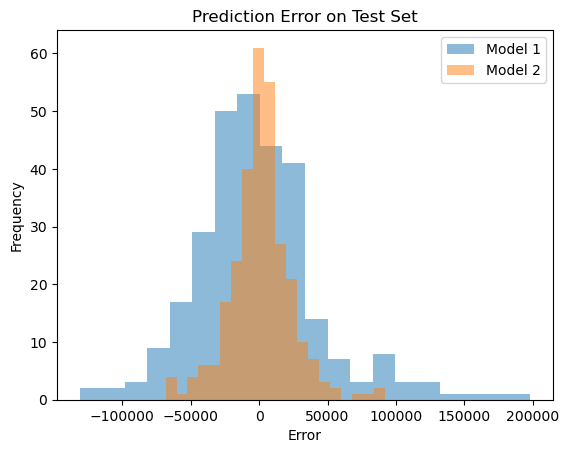

In [37]:
# Assuming you have the true target values 'y_true' and predicted target values 'y_pred1' and 'y_pred2' for Model 1 and Model 2 respectively
# Calculate the prediction errors for Model 1 and Model 2
error1 = y_test1 - y_pred1
error2 = y_test2 - y_pred2

# Plot the histogram of prediction errors for Model 1
plt.hist(error1, bins=20, label='Model 1', alpha=0.5)

# Plot the histogram of prediction errors for Model 2
plt.hist(error2, bins=20, label='Model 2', alpha=0.5)

# Set the plot title and labels
plt.title('Prediction Error on Test Set')
plt.xlabel('Error')
plt.ylabel('Frequency')

# Add a legend to the plot
plt.legend()

# Show the plot
plt.show()

### c. Comment on the model fitting.

Model2 fits better than model1. Model2 has lower RMSE and MAE error than Model1. The prediction error histogram plotted above shows that Model1 has very poor perfomance in comparison to Model2. Even the R-squared value, which tells the proportion of variability of data explained by the model is higher for Model2. 

Checking if Model2 is overfitting?

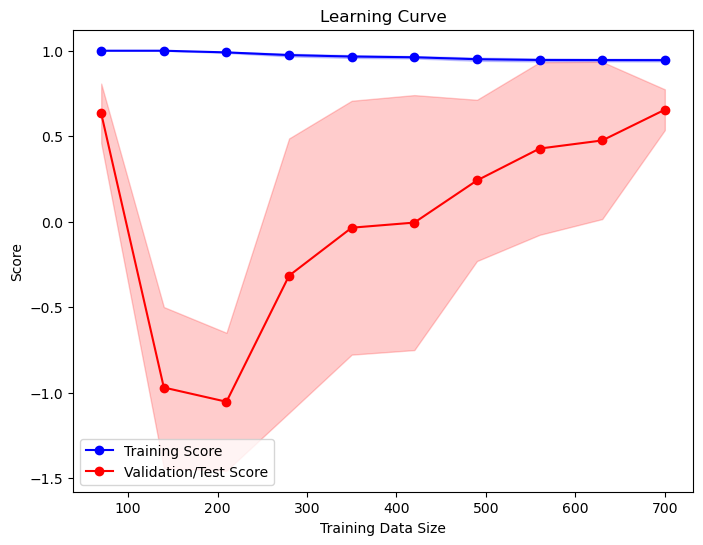

In [39]:
# Define the training sizes to evaluate
train_sizes = np.linspace(0.1, 1.0, 10)

# Calculate the learning curve scores
train_sizes_abs, train_scores, val_scores = learning_curve(model2, X, y, train_sizes=train_sizes, cv=5)

# Calculate the mean and standard deviation of the training and validation/test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes_abs, train_scores_mean, 'o-', color='blue', label='Training Score')
plt.plot(train_sizes_abs, val_scores_mean, 'o-', color='red', label='Validation/Test Score')

# Add error bands indicating the standard deviation
plt.fill_between(train_sizes_abs, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color='blue')
plt.fill_between(train_sizes_abs, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.2, color='red')

# Set plot labels and title
plt.xlabel('Training Data Size')
plt.ylabel('Score')
plt.title('Learning Curve')

# Add a legend
plt.legend()

# Show the plot
plt.show()

Plotting learning curve for model1

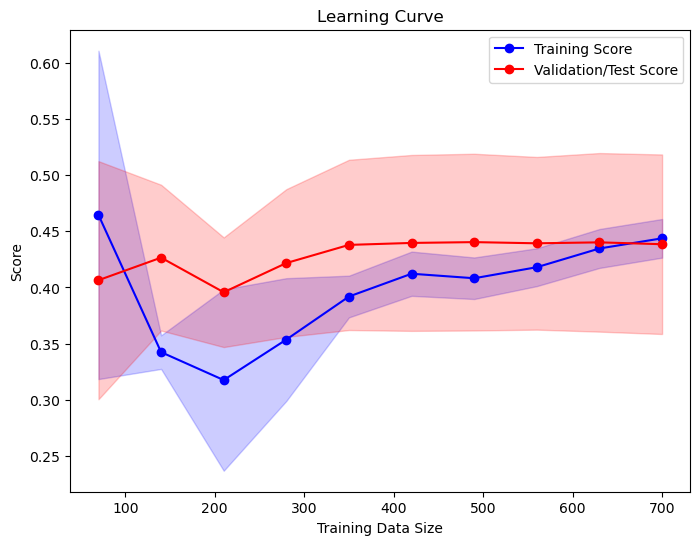

In [44]:
# Define the training sizes to evaluate
train_sizes = np.linspace(0.1, 1.0, 10)

# Calculate the learning curve scores
train_sizes_abs, train_scores, val_scores = learning_curve(model1, X1, y1, train_sizes=train_sizes, cv=5)

# Calculate the mean and standard deviation of the training and validation/test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes_abs, train_scores_mean, 'o-', color='blue', label='Training Score')
plt.plot(train_sizes_abs, val_scores_mean, 'o-', color='red', label='Validation/Test Score')

# Add error bands indicating the standard deviation
plt.fill_between(train_sizes_abs, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color='blue')
plt.fill_between(train_sizes_abs, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.2, color='red')

# Set plot labels and title
plt.xlabel('Training Data Size')
plt.ylabel('Score')
plt.title('Learning Curve')

# Add a legend
plt.legend()

# Show the plot
plt.show()

## Question 6: (12 points) Model 3. Variable Selection with Regularization: Now consider all the features (after removing linearly dependent variables).

### a. Fit a LASSO linear regression model on the training set with a package at your choice.

In [46]:
# Create a Lasso regression model
lasso_model = Lasso(alpha=0.1)  # You can adjust the value of the regularization parameter 'alpha'

X_train = train_df.drop('target',axis=1)  # Considering all the features available
y_train = train_df['target']    # Target variable

# Fit the Lasso model on the training data
lasso_model.fit(X_train, y_train)

/Users/pratikhotchandani/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.579e+11, tolerance: 4.973e+08
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.1)

In [47]:
print('Model intercept :', lasso_model.intercept_)
print('Model coefficients : ', lasso_model.coef_)
print('Model R-squared score : ', lasso_model.score(X_train, y_train))

Model intercept : -694540.6434737399
Model coefficients :  [ 1.79293756e+02  2.93247214e+01  7.46448059e-01  7.28022713e+03
  4.56058751e+03  2.32437056e+02  1.08648502e+02  2.46036664e+01
  2.10064250e+01  1.80272201e+01  8.89959454e+00  5.21853175e+00
  3.11149290e+01  4.43616150e+01  1.18035054e+01  5.63752028e+00
  3.45881689e+03  8.13876952e+02  5.19344662e+03  2.93962289e+03
 -4.14945162e+03 -1.47082108e+04  2.15510632e+03  2.54328633e+03
 -6.08111185e+00  1.49876645e+03  3.59912089e+01  1.64478727e+01
 -3.88653607e+00  2.26001011e+01  5.04336644e+01  5.41094874e+01
  1.00452602e+02  1.93362924e+00 -3.21794900e+02 -8.04106652e+01
 -2.60576391e+04  4.17156722e+03 -8.40688183e+03 -2.99318926e+03
  1.83626855e+03 -6.34792834e+04  1.79264115e-08 -1.09637971e+04
  0.00000000e+00 -3.66616924e+03  1.25716417e+03  7.01246087e+03
 -1.43409004e+02 -1.05703104e+04  8.94224045e+03 -9.51400622e+03
  7.73091115e+01  3.51319717e+04 -2.02949520e-10  4.87648307e+02
  8.88566916e+03 -6.34923377e+0

### b. Compare the model performance of lambda in the range of [0,1] with a step of 0.01. Plot RMSE versus log(lambda).

In [49]:
X_val = validate_df.drop('target',axis=1)  # Features
y_val = validate_df['target']

/var/folders/dq/pg0mssxn6yzdwtcdrwnt0bs80000gn/T/ipykernel_72652/1730787553.py:6: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso_model.fit(X_train, y_train)
/Users/pratikhotchandani/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/Users/pratikhotchandani/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.577e+11, tolerance: 4.973e+08 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ri

/Users/pratikhotchandani/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.529e+11, tolerance: 4.973e+08
  model = cd_fast.enet_coordinate_descent(
/Users/pratikhotchandani/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.489e+11, tolerance: 4.973e+08
  model = cd_fast.enet_coordinate_descent(
/Users/pratikhotchandani/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features

/Users/pratikhotchandani/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.504e+11, tolerance: 4.973e+08
  model = cd_fast.enet_coordinate_descent(
/Users/pratikhotchandani/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.478e+11, tolerance: 4.973e+08
  model = cd_fast.enet_coordinate_descent(
/Users/pratikhotchandani/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features

/Users/pratikhotchandani/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.558e+11, tolerance: 4.973e+08
  model = cd_fast.enet_coordinate_descent(
/Users/pratikhotchandani/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.582e+11, tolerance: 4.973e+08
  model = cd_fast.enet_coordinate_descent(
/Users/pratikhotchandani/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features

/Users/pratikhotchandani/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.591e+10, tolerance: 4.973e+08
  model = cd_fast.enet_coordinate_descent(
/Users/pratikhotchandani/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.738e+10, tolerance: 4.973e+08
  model = cd_fast.enet_coordinate_descent(
/Users/pratikhotchandani/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features

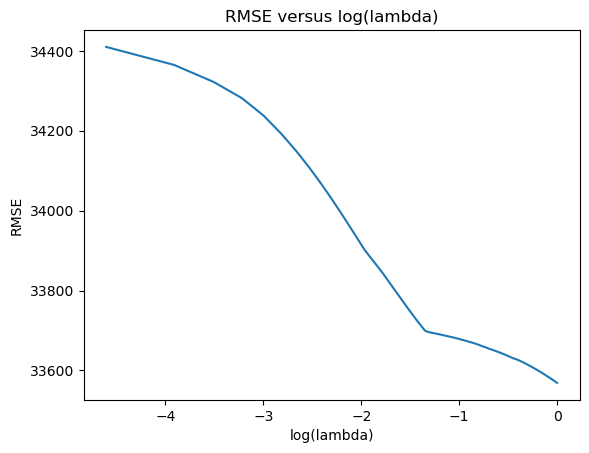

In [50]:
lambda_values = np.arange(0, 1.01, 0.01)
rmse_values = []
log_lambda_values = []
for lambda_val in lambda_values:
    lasso_model = Lasso(alpha=lambda_val)
    lasso_model.fit(X_train, y_train)
    y_pred = lasso_model.predict(X_val)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    rmse_values.append(rmse)
    log_lambda_values.append(np.log(lambda_val))


plt.plot(log_lambda_values, rmse_values)
plt.xlabel('log(lambda)')
plt.ylabel('RMSE')
plt.title('RMSE versus log(lambda)')
plt.show()
